In [23]:
# Import packages
import pandas as pd
import numpy as np
import itertools
from collections import Counter

# Plots
import matplotlib.pyplot as plt
import pycountry
import plotly.express as px
from ipywidgets import Dropdown, Output, VBox
from IPython.display import display, HTML
import ipywidgets as widgets

# Clustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

# Check for Missing Values and Duplicates

In [24]:
# Paths 2020 and 2024
csv_path2020_euroSciVoc = "./cordis-h2020projects-csv/euroSciVoc.csv"
csv_path2020_legalBasis = "./cordis-h2020projects-csv/legalBasis.csv"
csv_path2020_organization = "./cordis-h2020projects-csv/organization.csv"
csv_path2020_project = "./cordis-h2020projects-csv/project.csv"
csv_path2020_topics = "./cordis-h2020projects-csv/topics.csv"
csv_path2020_webItem = "./cordis-h2020projects-csv/webItem.csv"
csv_path2020_webLink = "./cordis-h2020projects-csv/webLink.csv"
csv_path2020_publication = "./cordis-h2020projects-csv/projectPublications2020.csv"

csv_path2024_euroSciVoc = "./cordis-HORIZONprojects-csv/euroSciVoc.csv"
csv_path2024_legalBasis = "./cordis-HORIZONprojects-csv/legalBasis.csv"
csv_path2024_organization = "./cordis-HORIZONprojects-csv/organization.csv"
csv_path2024_project = "./cordis-HORIZONprojects-csv/project.csv"
csv_path2024_topics = "./cordis-HORIZONprojects-csv/topics.csv"
csv_path2024_webItem = "./cordis-HORIZONprojects-csv/webItem.csv"
csv_path2024_webLink = "./cordis-HORIZONprojects-csv/webLink.csv"
csv_path2024_publication = "./cordis-HORIZONprojects-csv/projectPublications2024.csv"



In [25]:
## for horizon 2020 MISSING VALUES AND DUPLICATES

# Dataframes inlezen
df2020_euroSciVoc = pd.read_csv(csv_path2020_euroSciVoc, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_legalBasis = pd.read_csv(csv_path2020_legalBasis, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_organization = pd.read_csv(csv_path2020_organization, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_project = pd.read_csv(csv_path2020_project, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_topics = pd.read_csv(csv_path2020_topics, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_webItem = pd.read_csv(csv_path2020_webItem, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_webLink = pd.read_csv(csv_path2020_webLink, delimiter=";", on_bad_lines="skip", low_memory=False)
df2020_publication = pd.read_csv(csv_path2020_publication,delimiter=";", on_bad_lines="skip", low_memory=False)

# euroSciVoc
print("=== euroSciVoc ===")
print("Missing values:\n", df2020_euroSciVoc.isnull().sum())
print("Duplicated rows:", df2020_euroSciVoc.duplicated().sum(), "\n")

# legalBasis
print("=== legalBasis ===")
print("Missing values:\n", df2020_legalBasis.isnull().sum())
print("Duplicated rows:", df2020_legalBasis.duplicated().sum(), "\n")

# organization
print("=== organization ===")
print("Missing values:\n", df2020_organization.isnull().sum())
print("Duplicated rows:", df2020_organization.duplicated().sum(), "\n")

# project
print("=== project ===")
print("Missing values:\n", df2020_project.isnull().sum())
print("Duplicated rows:", df2020_project.duplicated().sum(), "\n")

# topics
print("=== topics ===")
print("Missing values:\n", df2020_topics.isnull().sum())
print("Duplicated rows:", df2020_topics.duplicated().sum(), "\n")

# webItem
print("=== webItem ===")
print("Missing values:\n", df2020_webItem.isnull().sum())
print("Duplicated rows:", df2020_webItem.duplicated().sum(), "\n")

# webLink
print("=== webLink ===")
print("Missing values:\n", df2020_webLink.isnull().sum())
print("Duplicated rows:", df2020_webLink.duplicated().sum(), "\n")

# publications 
print("=== publications ===")
print("Missing values:\n", df2020_publication.isnull().sum())
print("Duplicated rows:", df2020_publication.duplicated().sum(), "\n")

## duplicates verwijderen, we hebben hier geen meerwaarde aan 
## bepaalde rijen waar gegevens ontbreken, verwijderen we ook. bv waar projectID, title, startdate, enddate, maxEcContribution, EcContribution, role, country ontbreekt 

# PROJECT — nodig voor analyse van tijd, categorie en funding
df2020_project.drop_duplicates(inplace=True)
df2020_project.dropna(subset=["id", "title", "startDate", "ecMaxContribution"], inplace=True)

# ORGANIZATION — nodig voor funding en coördinatierollen per land
df2020_organization.drop_duplicates(inplace=True)
df2020_organization.dropna(subset=["projectID", "organisationID", "role", "country", "ecContribution"], inplace=True)

# EUROSCIVOC — nodig om projecten aan categorieën te koppelen
df2020_euroSciVoc.drop_duplicates(inplace=True)
df2020_euroSciVoc.dropna(subset=["projectID"], inplace=True)

# PUBLICATIONS
df2020_publication.drop_duplicates(inplace=True)
df2020_publication.dropna(subset=["projectID", "doi"], inplace= True)

=== euroSciVoc ===
Missing values:
 projectID                     0
euroSciVocCode                0
euroSciVocPath                0
euroSciVocTitle               0
euroSciVocDescription    114193
dtype: int64
Duplicated rows: 0 

=== legalBasis ===
Missing values:
 projectID                  0
legalBasis                 0
title                      0
uniqueProgrammePart    30399
dtype: int64
Duplicated rows: 0 

=== organization ===
Missing values:
 projectID                  0
projectAcronym             0
organisationID             0
vatNumber              23528
name                       0
shortName              40141
SME                      516
activityType             954
street                  1209
postCode                1986
city                     522
country                  264
nutsCode                 618
geolocation              232
organizationURL        62539
contactForm                0
contentUpdateDate          0
rcn                        0
order                   

In [26]:
## for horizon 2024
# Dataframes inlezen
df2024_euroSciVoc = pd.read_csv(csv_path2024_euroSciVoc, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_legalBasis = pd.read_csv(csv_path2024_legalBasis, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_organization = pd.read_csv(csv_path2024_organization, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_project = pd.read_csv(csv_path2024_project, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_topics = pd.read_csv(csv_path2024_topics, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_webItem = pd.read_csv(csv_path2024_webItem, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_webLink = pd.read_csv(csv_path2024_webLink, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_publication=pd.read_csv(csv_path2024_publication,  delimiter=";", on_bad_lines="skip", low_memory=False)

# euroSciVoc
print("=== euroSciVoc ===")
print("Missing values:\n", df2024_euroSciVoc.isnull().sum())
print("Duplicated rows:", df2024_euroSciVoc.duplicated().sum(), "\n")

# legalBasis
print("=== legalBasis ===")
print("Missing values:\n", df2024_legalBasis.isnull().sum())
print("Duplicated rows:", df2024_legalBasis.duplicated().sum(), "\n")

# organization
print("=== organization ===")
print("Missing values:\n", df2024_organization.isnull().sum())
print("Duplicated rows:", df2024_organization.duplicated().sum(), "\n")

# project
print("=== project ===")
print("Missing values:\n", df2024_project.isnull().sum())
print("Duplicated rows:", df2024_project.duplicated().sum(), "\n")

# topics
print("=== topics ===")
print("Missing values:\n", df2024_topics.isnull().sum())
print("Duplicated rows:", df2024_topics.duplicated().sum(), "\n")

# webItem
print("=== webItem ===")
print("Missing values:\n", df2024_webItem.isnull().sum())
print("Duplicated rows:", df2024_webItem.duplicated().sum(), "\n")

# webLink
print("=== webLink ===")
print("Missing values:\n", df2024_webLink.isnull().sum())
print("Duplicated rows:", df2024_webLink.duplicated().sum(), "\n")

# publications 
print("=== publications ===")
print("Missing values:\n", df2024_publication.isnull().sum())
print("Duplicated rows:", df2024_publication.duplicated().sum(), "\n")

## duplicates verwijderen, we hebben hier geen meerwaarde aan 
## bepaalde rijen waar gegevens ontbreken, verwijderen we ook. bv waar projectID, title, startdate, enddate, maxEcContribution, EcContribution, role, country ontbreekt 

# PROJECT — nodig voor analyse van tijd, categorie en funding
df2024_project.drop_duplicates(inplace=True)
df2024_project.dropna(subset=["id", "title", "startDate", "ecMaxContribution"], inplace=True)

# ORGANIZATION — nodig voor funding en coördinatierollen per land
df2024_organization.drop_duplicates(inplace=True)
df2024_organization.dropna(subset=["projectID", "organisationID", "role", "country", "ecContribution"], inplace=True)

# EUROSCIVOC — nodig om projecten aan categorieën te koppelen
df2024_euroSciVoc.drop_duplicates(inplace=True)
df2024_euroSciVoc.dropna(subset=["projectID"], inplace=True)

# PUBLICATIONS
df2024_publication.drop_duplicates(inplace=True)
df2024_publication.dropna(subset=["projectID", "doi"], inplace= True)


=== euroSciVoc ===
Missing values:
 projectID                    0
euroSciVocCode               0
euroSciVocPath               0
euroSciVocTitle              0
euroSciVocDescription    38789
dtype: int64
Duplicated rows: 0 

=== legalBasis ===
Missing values:
 projectID                 0
legalBasis                0
title                     0
uniqueProgrammePart    5171
dtype: int64
Duplicated rows: 0 

=== organization ===
Missing values:
 projectID                  0
projectAcronym             0
organisationID             0
vatNumber              15403
name                       0
shortName              25507
SME                      263
activityType              24
street                   300
postCode                 786
city                     263
country                   13
nutsCode                 278
geolocation              588
organizationURL        38954
contactForm                0
contentUpdateDate          0
rcn                        0
order                      0
role

# Research Categories

In [5]:
# Look if column euroSciVocPath exists
if 'euroSciVocPath' not in df2020_euroSciVoc.columns or 'euroSciVocPath' not in df2024_euroSciVoc.columns:
    raise ValueError("Column 'euroSciVocPath' not found")

# Extract category
df2020_euroSciVoc['category2020'] = df2020_euroSciVoc['euroSciVocPath'].str.split('/').str[1]
df2024_euroSciVoc['category2024'] = df2024_euroSciVoc['euroSciVocPath'].str.split('/').str[1]

# Count rows per category
category_counts_2020 = df2020_euroSciVoc['category2020'].value_counts().reset_index()
category_counts_2024 = df2024_euroSciVoc['category2024'].value_counts().reset_index()

# Choose column names
category_counts_2020.columns = ['category', 'count_2020']
category_counts_2024.columns = ['category', 'count_2024']

# Print 
print("\nNumber of projects per category in 2020:")
print(category_counts_2020.to_string(index=False))

print("\nNumber of projects per category in 2024:")
print(category_counts_2024.to_string(index=False))


Number of projects per category in 2020:
                   category  count_2020
           natural sciences       48421
 engineering and technology       25267
medical and health sciences       17468
            social sciences       16024
                 humanities        4028
      agricultural sciences        2985

Number of projects per category in 2024:
                   category  count_2024
           natural sciences       18075
 engineering and technology        6680
medical and health sciences        5985
            social sciences        5027
                 humanities        1739
      agricultural sciences        1283


In [6]:
# Load project files
df2020_proj = pd.read_csv(csv_path2020_project, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_proj = pd.read_csv(csv_path2024_project, delimiter=";", on_bad_lines="skip", low_memory=False)

# Combine project data
df_proj = pd.concat([df2020_proj, df2024_proj], ignore_index=True)

# Extract year from startDate
df_proj['startYear'] = pd.to_datetime(df_proj['startDate'], errors='coerce').dt.year

# Load euroscivoc files
df2020_euro = pd.read_csv(csv_path2020_euroSciVoc, delimiter=";", on_bad_lines="skip", low_memory=False)
df2024_euro = pd.read_csv(csv_path2024_euroSciVoc, delimiter=";", on_bad_lines="skip", low_memory=False)

# Combine euroSciVoc data
df_euro = pd.concat([df2020_euro, df2024_euro], ignore_index=True)

# Check if 'euroSciVocPath' exists
if 'euroSciVocPath' not in df_euro.columns:
    raise ValueError("Column 'euroSciVocPath' not found")

# Extract category
df_euro['category'] = df_euro['euroSciVocPath'].str.split('/').str[1]

# Merge euroSciVoc with project info
df_merged = df_euro.merge(df_proj, left_on='projectID', right_on='id')

# Count projects per category per year
category_per_year = df_merged.groupby(['startYear', 'category']).size().reset_index(name='project_count')

# Fix year column format
category_per_year['Year'] = category_per_year['startYear'].astype('Int64')
category_per_year = category_per_year.drop(columns='startYear')

# Print
print(category_per_year.sort_values(['Year', 'project_count'], ascending=[True, False]).to_string(index=False))

category_per_year.to_csv("category_per_year", index = False)


                   category  project_count  Year
 engineering and technology            351  2014
           natural sciences            213  2014
            social sciences            165  2014
medical and health sciences            127  2014
      agricultural sciences             24  2014
                 humanities              6  2014
           natural sciences           7656  2015
 engineering and technology           4255  2015
medical and health sciences           2624  2015
            social sciences           2464  2015
                 humanities            453  2015
      agricultural sciences            442  2015
           natural sciences           7827  2016
 engineering and technology           4258  2016
medical and health sciences           2724  2016
            social sciences           2641  2016
                 humanities            623  2016
      agricultural sciences            420  2016
           natural sciences           7273  2017
 engineering and tec

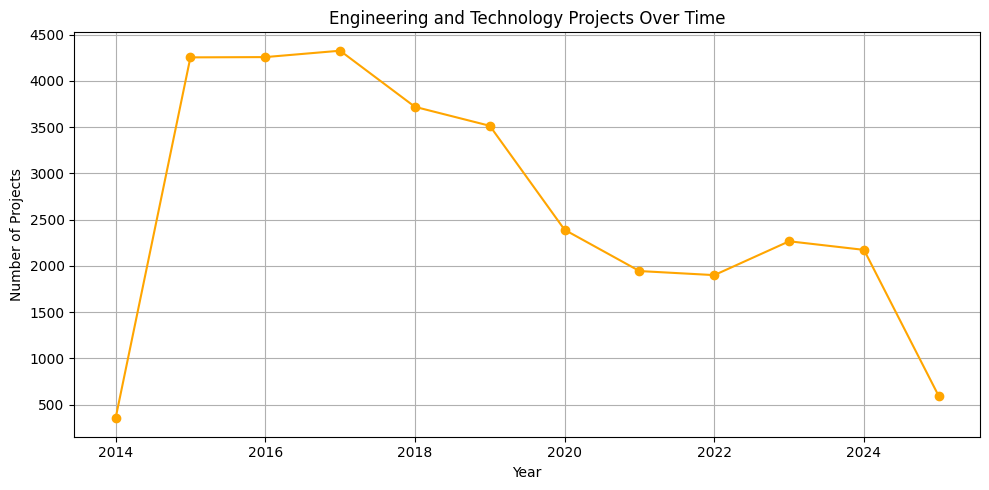

In [7]:
# Filter de juiste categorie
eng_tech = category_per_year[category_per_year['category'] == 'engineering and technology']

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(eng_tech['Year'], eng_tech['project_count'], marker='o', color='orange')
plt.title('Engineering and Technology Projects Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# Output-widget
out = Output()

# Alle categorieën
categories = sorted(category_per_year['category'].dropna().unique())

# Dropdown-widget
dropdown = Dropdown(
    options=categories,
    value='engineering and technology',
    description='Categorie:'
)

# Plotfunctie
def create_plot(selected_cat):
    data = category_per_year[category_per_year['category'] == selected_cat]
    fig = px.line(
        data,
        x='Year',
        y='project_count',
        markers=True,
        title=f'{selected_cat.capitalize()} Projects Over Time',
        labels={'project_count': 'Number of Projects'}
    )
    fig.update_layout(
        height=500,
        margin={"r": 0, "t": 50, "l": 0, "b": 0}
    )
    return fig

# Update-functie
def update_plot(change):
    with out:
        out.clear_output(wait=True)
        selected = change['new']
        fig = create_plot(selected)
        display(HTML(fig.to_html(include_plotlyjs='cdn')))

# Koppel de update-functie aan dropdown
dropdown.observe(update_plot, names='value')

# UI tonen
display(VBox([dropdown, out]))

# Initieel plot weergeven
with out:
    fig = create_plot(dropdown.value)
    display(HTML(fig.to_html(include_plotlyjs='cdn')))


# Funding Distribution 

## Comparison Across countries

### In organization.csv: columns ‘ecContribution’, ‘netEcContribution’

In [9]:
# Look if required columns exist
required_cols = ['country', 'ecContribution', 'netEcContribution']
for col in required_cols:
    if col not in df2020_organization.columns or col not in df2024_organization.columns:
        raise ValueError(f"Column '{col}' not found in one of the datasets")

# Group by country and sum contributions
funding_2020 = df2020_organization.groupby('country')[['ecContribution', 'netEcContribution']].sum().reset_index()
funding_2024 = df2024_organization.groupby('country')[['ecContribution', 'netEcContribution']].sum().reset_index()

# Choose column names
funding_2020.columns = ['country', 'ecContribution_2020', 'netEcContribution_2020']
funding_2024.columns = ['country', 'ecContribution_2024', 'netEcContribution_2024']

# Merge datasets on country
merged_funding = pd.merge(funding_2020, funding_2024, on='country', how='outer').fillna(0)

# Print 
# print("\nFunding distribution comparison (H2020 vs Horizon Europe):")
# print(merged_funding.sort_values(by='ecContribution_2024', ascending=False).to_string(index=False))

merged_funding.to_csv("merged_funding.csv", index=False)

In [10]:
# ISO2 naar ISO3
def convert_iso2_to_iso3(iso2_code):
    try:
        return pycountry.countries.get(alpha_2=iso2_code).alpha_3
    except:
        return None

# Kaartfunctie
def create_map(data, year, funding_column):
    data = merged_funding.copy()
    data["iso_alpha"] = data["country"].apply(convert_iso2_to_iso3)
    fig = px.scatter_geo(
        data,
        locations="iso_alpha",
        locationmode="ISO-3",
        size=funding_column,
        hover_name="country",
        projection="natural earth",
        title=f"Funding Levels in {year}",
        size_max=50
    )
    fig.update_geos(
        showcountries=True,
        countrycolor="LightGray",
        showcoastlines=True,
        coastlinecolor="LightGray",
    )
    fig.update_layout(
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
        height=600,
    )
    return fig

# Output-widget
out = Output()

# Toggle-knop
toggle = widgets.ToggleButtons(
    options=['2020', '2024'],
    description='Year:',
    button_style=''
)

# Update-functie
def update_map(change):
    with out:
        out.clear_output(wait=True)
        year = change['new']
        col = 'ecContribution_2020' if year == '2020' else 'ecContribution_2024'
        fig = create_map(merged_funding, int(year), col)
        html = fig.to_html(include_plotlyjs='cdn')
        display(HTML(html))

# Koppel functie
toggle.observe(update_map, names='value')

# UI tonen
display(VBox([toggle, out]))

# Start met 2020-kaart
toggle.value = '2020'  # Triggert automatisch de juiste kaart

## Network analysis

In [11]:

def country_network_matrices(df, id_col='projectID', country_col='country'):
    """
    Build:
      • network_df  : symmetric country‑by‑country co‑operation counts
      • distance_df : 1 – 1/n transformation of network_df
      • norm_df     : distance_df normalised by row+column totals
    Returns the three dataframes in that order.
    """

    # ── 1. Project‑country incidence matrix (binary) ────────────────────────────
    incidence = (df[[id_col, country_col]]
                 .drop_duplicates()              # one flag per project–country
                 .assign(val=1)
                 .pivot(index=id_col, columns=country_col, values='val')
                 .fillna(0)
                 .astype(int))

    # ── 2. Co‑operation counts between countries (adjacency) ───────────────────
    network_df = incidence.T @ incidence          # matrix multiplication
    np.fill_diagonal(network_df.values, 0)        # remove self‑loops
    network_df = network_df.astype(int)

    # ── 3. Distance matrix: 1 – 1/n ────────────────────────────────────────────
    with np.errstate(divide='ignore'):            # suppress divide‑by‑zero warnings
        distance_df = 1 - 1 / network_df.replace(0, np.nan)
    distance_df = distance_df.fillna(0)

    # ── 4. Normalised matrix: d_ij / (total_i + total_j) ───────────────────────
    totals = distance_df.sum(axis=1).to_numpy()          # row sums as 1‑D array
    denom  = totals[:, None] + totals[None, :]           # outer sum
    norm    = np.divide(distance_df.values,
                        denom,
                        out=np.zeros_like(distance_df.values),
                        where=denom != 0)                # avoid /0
    norm_df = pd.DataFrame(norm,
                           index=distance_df.index,
                           columns=distance_df.columns)

    return network_df, distance_df, norm_df


In [12]:
network_df2020, distance_df2020, norm_df2020 = country_network_matrices(df2020_organization)
network_df2024, distance_df2024, norm_df2024 = country_network_matrices(df2024_organization)

In [13]:
network_df2020.to_csv('landen_samenwerking_matrix2020.csv')
network_df2024.to_csv('landen_samenwerking_matrix2024.csv')

In [14]:
# ───── Helper: ISO2 → ISO3 ─────
def iso2_to_iso3(code: str) -> str | None:
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# ───── Run clustering on a norm_df ─────
def cluster_dataframe(norm_df: pd.DataFrame, algo, name: str) -> pd.DataFrame:
    if getattr(algo, "metric", None) == "precomputed" or getattr(algo, "affinity", "") == "precomputed":
        algo.fit(norm_df)
    else:
        algo.fit(norm_df.values)

    return (
        pd.DataFrame({
            "country": norm_df.index,
            "cluster": algo.labels_.astype(str)
        })
        .assign(iso_alpha=lambda df: df["country"].map(iso2_to_iso3))
        .dropna(subset=["iso_alpha"])
    )

# ───── Plot clustering result ─────
def cluster_map(df: pd.DataFrame, title: str) -> px.choropleth:
    fig = px.choropleth(
        df,
        locations="iso_alpha",
        color="cluster",
        hover_name="country",
        color_discrete_sequence=px.colors.qualitative.Set3,
        projection="natural earth",
        title=title
    )
    fig.update_geos(showcountries=True, countrycolor="LightGray",
                    showcoastlines=True, coastlinecolor="Gray")
    fig.update_layout(margin=dict(r=0, l=0, t=50, b=0))
    return fig


In [ ]:
# Parameters
N_CLUSTERS = 5
EPS        = 1

# Algorithms
clusterers = {
    "K-means":   KMeans(n_clusters=N_CLUSTERS, n_init="auto", random_state=42),
    "Spectral":  SpectralClustering(n_clusters=N_CLUSTERS, affinity="precomputed", random_state=42),
    "DBSCAN":    DBSCAN(eps=EPS, metric="precomputed")
}

# Your precomputed matrices
distance_matrices = {
    2020: norm_df2020,
    2024: norm_df2024
}

# Run all and store results
figs = {}

for year, norm_df in distance_matrices.items():
    for algo_name, algo in clusterers.items():
        df_clustered = cluster_dataframe(norm_df, algo, algo_name)
        figs[(year, algo_name)] = cluster_map(
            df_clustered,
            f"{algo_name} clustering — international cooperation ({year})"
        )

# Example: show or export
figs[(2024, "K-means")].show()
figs[(2020, "K-means")].show()

# figs[(2024, "K-means")].write_html("kmeans_2024.html")


In [18]:
# DBScan
dbscan = DBSCAN(eps=1, metric='precomputed')
clustering = dbscan.fit(norm_df)
labels = clustering.labels_

In [20]:
# Show all plots for 2020 and 2024
for year in [2020, 2024]:
    for algo_name in clusterers.keys():
        figs[(year, algo_name)].show()

Clusteren per 1 jaar 

In [21]:
def cluster_projects_for_year(year: int, df_project_2020, df_project_2024,
                              df_org_2020, df_org_2024):
    # Combineer projectdata
    df_projects_all = pd.concat([
        df_project_2020.assign(source_year=2020),
        df_project_2024.assign(source_year=2024)
    ])
    
    # Filter op opgegeven startjaar
    df_projects_all['startDate'] = pd.to_datetime(df_projects_all['startDate'], errors='coerce')
    project_ids = df_projects_all[df_projects_all['startDate'].dt.year == year]['id']
    
    # Combineer organization data
    df_org_all = pd.concat([df_org_2020, df_org_2024])
    
    # Filter organization data op relevante projecten
    df_filtered_org = df_org_all[df_org_all['projectID'].isin(project_ids)]

    # Bereken matrices
    network_df, distance_df, norm_df = country_network_matrices(df_filtered_org)

    # Clusteringsalgoritmen
    N_CLUSTERS = 5
    EPS        = 1

    clusterers = {
        "K-means":   KMeans(n_clusters=N_CLUSTERS, n_init="auto", random_state=42),
        "Spectral":  SpectralClustering(n_clusters=N_CLUSTERS, affinity="precomputed", random_state=42),
        "DBSCAN":    DBSCAN(eps=EPS, metric="precomputed")
    }

    # Resultaten opslaan
    figs = {}

    for algo_name, algo in clusterers.items():
        if algo_name == "Spectral":
            input_matrix = 1 - norm_df
        else:
            input_matrix = norm_df

        df_clustered = cluster_dataframe(input_matrix, algo, algo_name)
        figs[algo_name] = cluster_map(
            df_clustered,
            f"{algo_name} clustering — international cooperation ({year})"
        )

    # Toon plots
    for fig in figs.values():
        fig.show()


In [22]:
cluster_projects_for_year(
    2019,
    df2020_project, df2024_project,
    df2020_organization, df2024_organization
)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from ipywidgets import Dropdown, VBox, Output
from IPython.display import display, HTML
import plotly.express as px
import pycountry

# Functie om ISO2 → ISO3 om te zetten
def iso2_to_iso3(code: str) -> str | None:
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Matrixfunctie
def country_network_matrices(df, id_col='projectID', country_col='country'):
    incidence = (df[[id_col, country_col]]
                 .drop_duplicates()
                 .assign(val=1)
                 .pivot(index=id_col, columns=country_col, values='val')
                 .fillna(0)
                 .astype(int))

    network_df = incidence.T @ incidence
    np.fill_diagonal(network_df.values, 0)
    network_df = network_df.astype(int)

    with np.errstate(divide='ignore'):
        distance_df = 1 - 1 / network_df.replace(0, np.nan)
    distance_df = distance_df.fillna(0)

    totals = distance_df.sum(axis=1).to_numpy()
    denom = totals[:, None] + totals[None, :]
    norm = np.divide(distance_df.values, denom,
                     out=np.zeros_like(distance_df.values),
                     where=denom != 0)

    norm_df = pd.DataFrame(norm, index=distance_df.index, columns=distance_df.columns)
    return network_df, distance_df, norm_df

# Clusteringfunctie
def cluster_dataframe(norm_df: pd.DataFrame, algo, name: str) -> pd.DataFrame:
    if getattr(algo, "metric", None) == "precomputed" or getattr(algo, "affinity", "") == "precomputed":
        algo.fit(norm_df)
    else:
        algo.fit(norm_df.values)

    return (
        pd.DataFrame({
            "country": norm_df.index,
            "cluster": algo.labels_.astype(str)
        })
        .assign(iso_alpha=lambda df: df["country"].map(iso2_to_iso3))
        .dropna(subset=["iso_alpha"])
    )

# Plotfunctie
def cluster_map(df: pd.DataFrame, title: str) -> px.choropleth:
    fig = px.choropleth(
        df,
        locations="iso_alpha",
        color="cluster",
        hover_name="country",
        color_discrete_sequence=px.colors.qualitative.Set3,
        projection="natural earth",
        title=title
    )
    fig.update_geos(showcountries=True, countrycolor="LightGray",
                    showcoastlines=True, coastlinecolor="Gray")
    fig.update_layout(margin=dict(r=0, l=0, t=50, b=0))
    return fig

# Kernfunctie: clustering voor één jaar
def cluster_projects_for_year(selected_year: int) -> list:
    df_projects_all = pd.concat([
        df2020_project.assign(source=2020),
        df2024_project.assign(source=2024)
    ])
    df_projects_all['startDate'] = pd.to_datetime(df_projects_all['startDate'], errors='coerce')
    project_ids = df_projects_all[df_projects_all['startDate'].dt.year == selected_year]['id']
    df_org_all = pd.concat([df2020_organization, df2024_organization])
    df_filtered_org = df_org_all[df_org_all['projectID'].isin(project_ids)]

    if df_filtered_org.empty:
        return []

    _, _, norm_df = country_network_matrices(df_filtered_org)

    clusterers = {
        "K-means":   KMeans(n_clusters=5, n_init="auto", random_state=42),
        "Spectral":  SpectralClustering(n_clusters=5, affinity="precomputed", random_state=42),
        "DBSCAN":    DBSCAN(eps=1, metric="precomputed")
    }

    figs = []
    for algo_name, algo in clusterers.items():
        input_matrix = 1 - norm_df if algo_name == "Spectral" else norm_df
        df_clustered = cluster_dataframe(input_matrix, algo, algo_name)
        fig = cluster_map(df_clustered, f"{algo_name} clustering — international cooperation ({selected_year})")
        figs.append(fig)

    return figs

# Unieke jaartallen ophalen
df_combined = pd.concat([df2020_project, df2024_project])
df_combined['startDate'] = pd.to_datetime(df_combined['startDate'], errors='coerce')
available_years = sorted(df_combined['startDate'].dt.year.dropna().unique().astype(int))

# UI: dropdown + output
dropdown = Dropdown(
    options=available_years,
    value=available_years[0],
    description='Startjaar:'
)

out = Output()

def update_plot(change):
    with out:
        out.clear_output(wait=True)
        year = change['new']
        figs = cluster_projects_for_year(year)
        if figs:
            for fig in figs:
                display(HTML(fig.to_html(include_plotlyjs='cdn')))
        else:
            print("Geen projecten gevonden voor dit jaar.")

# Observeer dropdown
dropdown.observe(update_plot, names='value')

# Toon interface
display(VBox([dropdown, out]))

# Toon initiële plot
with out:
    initial_figs = cluster_projects_for_year(dropdown.value)
    for fig in initial_figs:
        display(HTML(fig.to_html(include_plotlyjs='cdn')))


In [ ]:
from ipywidgets import Dropdown, VBox, HBox, Output
from IPython.display import display, HTML

# Clustering methodes
CLUSTERERS = {
    "K-means":   KMeans(n_clusters=5, n_init="auto", random_state=42),
    "Spectral":  SpectralClustering(n_clusters=5, affinity="precomputed", random_state=42),
    "DBSCAN":    DBSCAN(eps=1, metric="precomputed")
}

# Alle beschikbare jaren
df_combined = pd.concat([df2020_project, df2024_project])
df_combined['startDate'] = pd.to_datetime(df_combined['startDate'], errors='coerce')
available_years = sorted(df_combined['startDate'].dt.year.dropna().unique().astype(int))

# Dropdowns
year_dropdown = Dropdown(
    options=available_years,
    value=available_years[0],
    description='Startjaar:'
)

method_dropdown = Dropdown(
    options=list(CLUSTERERS.keys()),
    value="K-means",
    description='Methode:'
)

# Output-widget
out = Output()

# Plot-updatefunctie
def update_plot(*args):
    with out:
        out.clear_output(wait=True)
        year = year_dropdown.value
        method = method_dropdown.value

        # Filter projecten en organisaties
        df_projects_all = pd.concat([
            df2020_project.assign(source=2020),
            df2024_project.assign(source=2024)
        ])
        df_projects_all['startDate'] = pd.to_datetime(df_projects_all['startDate'], errors='coerce')
        project_ids = df_projects_all[df_projects_all['startDate'].dt.year == year]['id']
        df_org_all = pd.concat([df2020_organization, df2024_organization])
        df_filtered_org = df_org_all[df_org_all['projectID'].isin(project_ids)]

        if df_filtered_org.empty:
            print("Geen projecten gevonden voor dit jaar.")
            return

        _, _, norm_df = country_network_matrices(df_filtered_org)

        algo = CLUSTERERS[method]
        input_matrix = 1 - norm_df if method == "Spectral" else norm_df
        df_clustered = cluster_dataframe(input_matrix, algo, method)
        fig = cluster_map(df_clustered, f"{method} clustering — international cooperation ({year})")
        display(HTML(fig.to_html(include_plotlyjs='cdn')))

# Koppel update aan dropdowns
year_dropdown.observe(update_plot, names='value')
method_dropdown.observe(update_plot, names='value')

# UI tonen
display(VBox([HBox([year_dropdown, method_dropdown]), out]))

# Initieel plot
update_plot()
